# 탐색적 데이터 분석

## #01. 작업준비

### 1. 패키지 참조

In [9]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies, merge
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [2]:
origin = read_excel('분석용데이터.xlsx')
print(origin.shape)
print(origin.info())
origin.head()

(318816, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318816 entries, 0 to 318815
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   기준_년_코드    318816 non-null  int64  
 1   기준_분기_코드   318816 non-null  int64  
 2   상권_코드      318816 non-null  int64  
 3   분기당_매출_금액  318807 non-null  float64
 4   주중_매출_금액   318807 non-null  float64
 5   주말_매출_금액   318807 non-null  float64
 6   남성_매출_금액   318807 non-null  float64
 7   여성_매출_금액   318807 non-null  float64
 8   점포수        318807 non-null  float64
 9   Covid19    318807 non-null  float64
 10  일과시간_금액    318807 non-null  float64
 11  일과이후_금액    318807 non-null  float64
 12  청년금액       318807 non-null  float64
 13  중년금액       318807 non-null  float64
 14  장년금액       318807 non-null  float64
 15  상권_코드_명    318807 non-null  object 
 16  엑스좌표_값     318807 non-null  float64
 17  와이좌표_값     318807 non-null  float64
 18  시군구_코드     318807 non-null  float64
 19  행정동_코드    

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,Covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,1,1000289,6044732.0,6044732.0,0.0,6044732.0,0.0,4.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
1,2018,1,1000289,215709724.0,144307921.0,71401803.0,96702568.0,109364383.0,3.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
2,2018,1,1000289,52890511.0,33998855.0,18891656.0,25764148.0,24829371.0,1.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
3,2018,1,1000289,34741527.0,34741527.0,0.0,33831273.0,910254.0,3.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
4,2018,1,1000289,16863024.0,13525303.0,3337721.0,3745929.0,12665481.0,10.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN


### 3. 명목형 변수에 대한 데이터 타입 변경

In [3]:
df = origin.astype({
     '기준_년_코드': 'category',
    '기준_분기_코드':  'category',
    '상권_코드': 'category',
    '상권_코드_명': 'category',
    '시군구_코드': 'category',
    '행정동_코드': 'category',
    '시군구명': 'category',
    '시군구코드': 'category',
    'Covid19':'category',
    '도심': 'category',
    
})

## #02. 명목형 변수에 대한 기초 통계량 확인

### 각 컬럼의 데이터 타입 확인

In [10]:
df.dtypes

기준_년_코드      category
기준_분기_코드     category
상권_코드        category
분기당_매출_금액     float64
주중_매출_금액      float64
주말_매출_금액      float64
남성_매출_금액      float64
여성_매출_금액      float64
점포수           float64
Covid19      category
일과시간_금액       float64
일과이후_금액       float64
청년금액          float64
중년금액          float64
장년금액          float64
상권_코드_명      category
엑스좌표_값        float64
와이좌표_값        float64
시군구_코드       category
행정동_코드       category
시군구명         category
시군구코드        category
도심           category
총_직장_인구_수     float64
총_생활인구_수      float64
dtype: object

### 명목형변수의 이름을 추출



In [11]:
cnames = []

for i,v in enumerate(df.dtypes):
    if v == 'category':
        cnames.append(df.columns[i])

cnames

['기준_년_코드',
 '기준_분기_코드',
 '상권_코드',
 'Covid19',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구명',
 '시군구코드',
 '도심']

### 명목형 변수로만 구성된 새로운 데이터프레임을 생성

In [12]:
cdf = df[cnames]
cdf

,기준_년_코드,기준_분기_코드,상권_코드,Covid19,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
0,2018,1,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
1,2018,1,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
2,2018,1,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
3,2018,1,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
4,2018,1,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
...,...,...,...,...,...,...,...,...,...,...
318811,2020,3,1000805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318812,2020,2,1000805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318813,2020,1,1000805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318814,2021,2,1000805,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 확인이 필요한 컬럼에 대한 카운트 플롯

같은 역할을 하는 컬럼은 지우기: 상권_코드_명, 시군구_코드, 행정동_코드, 시군구코드

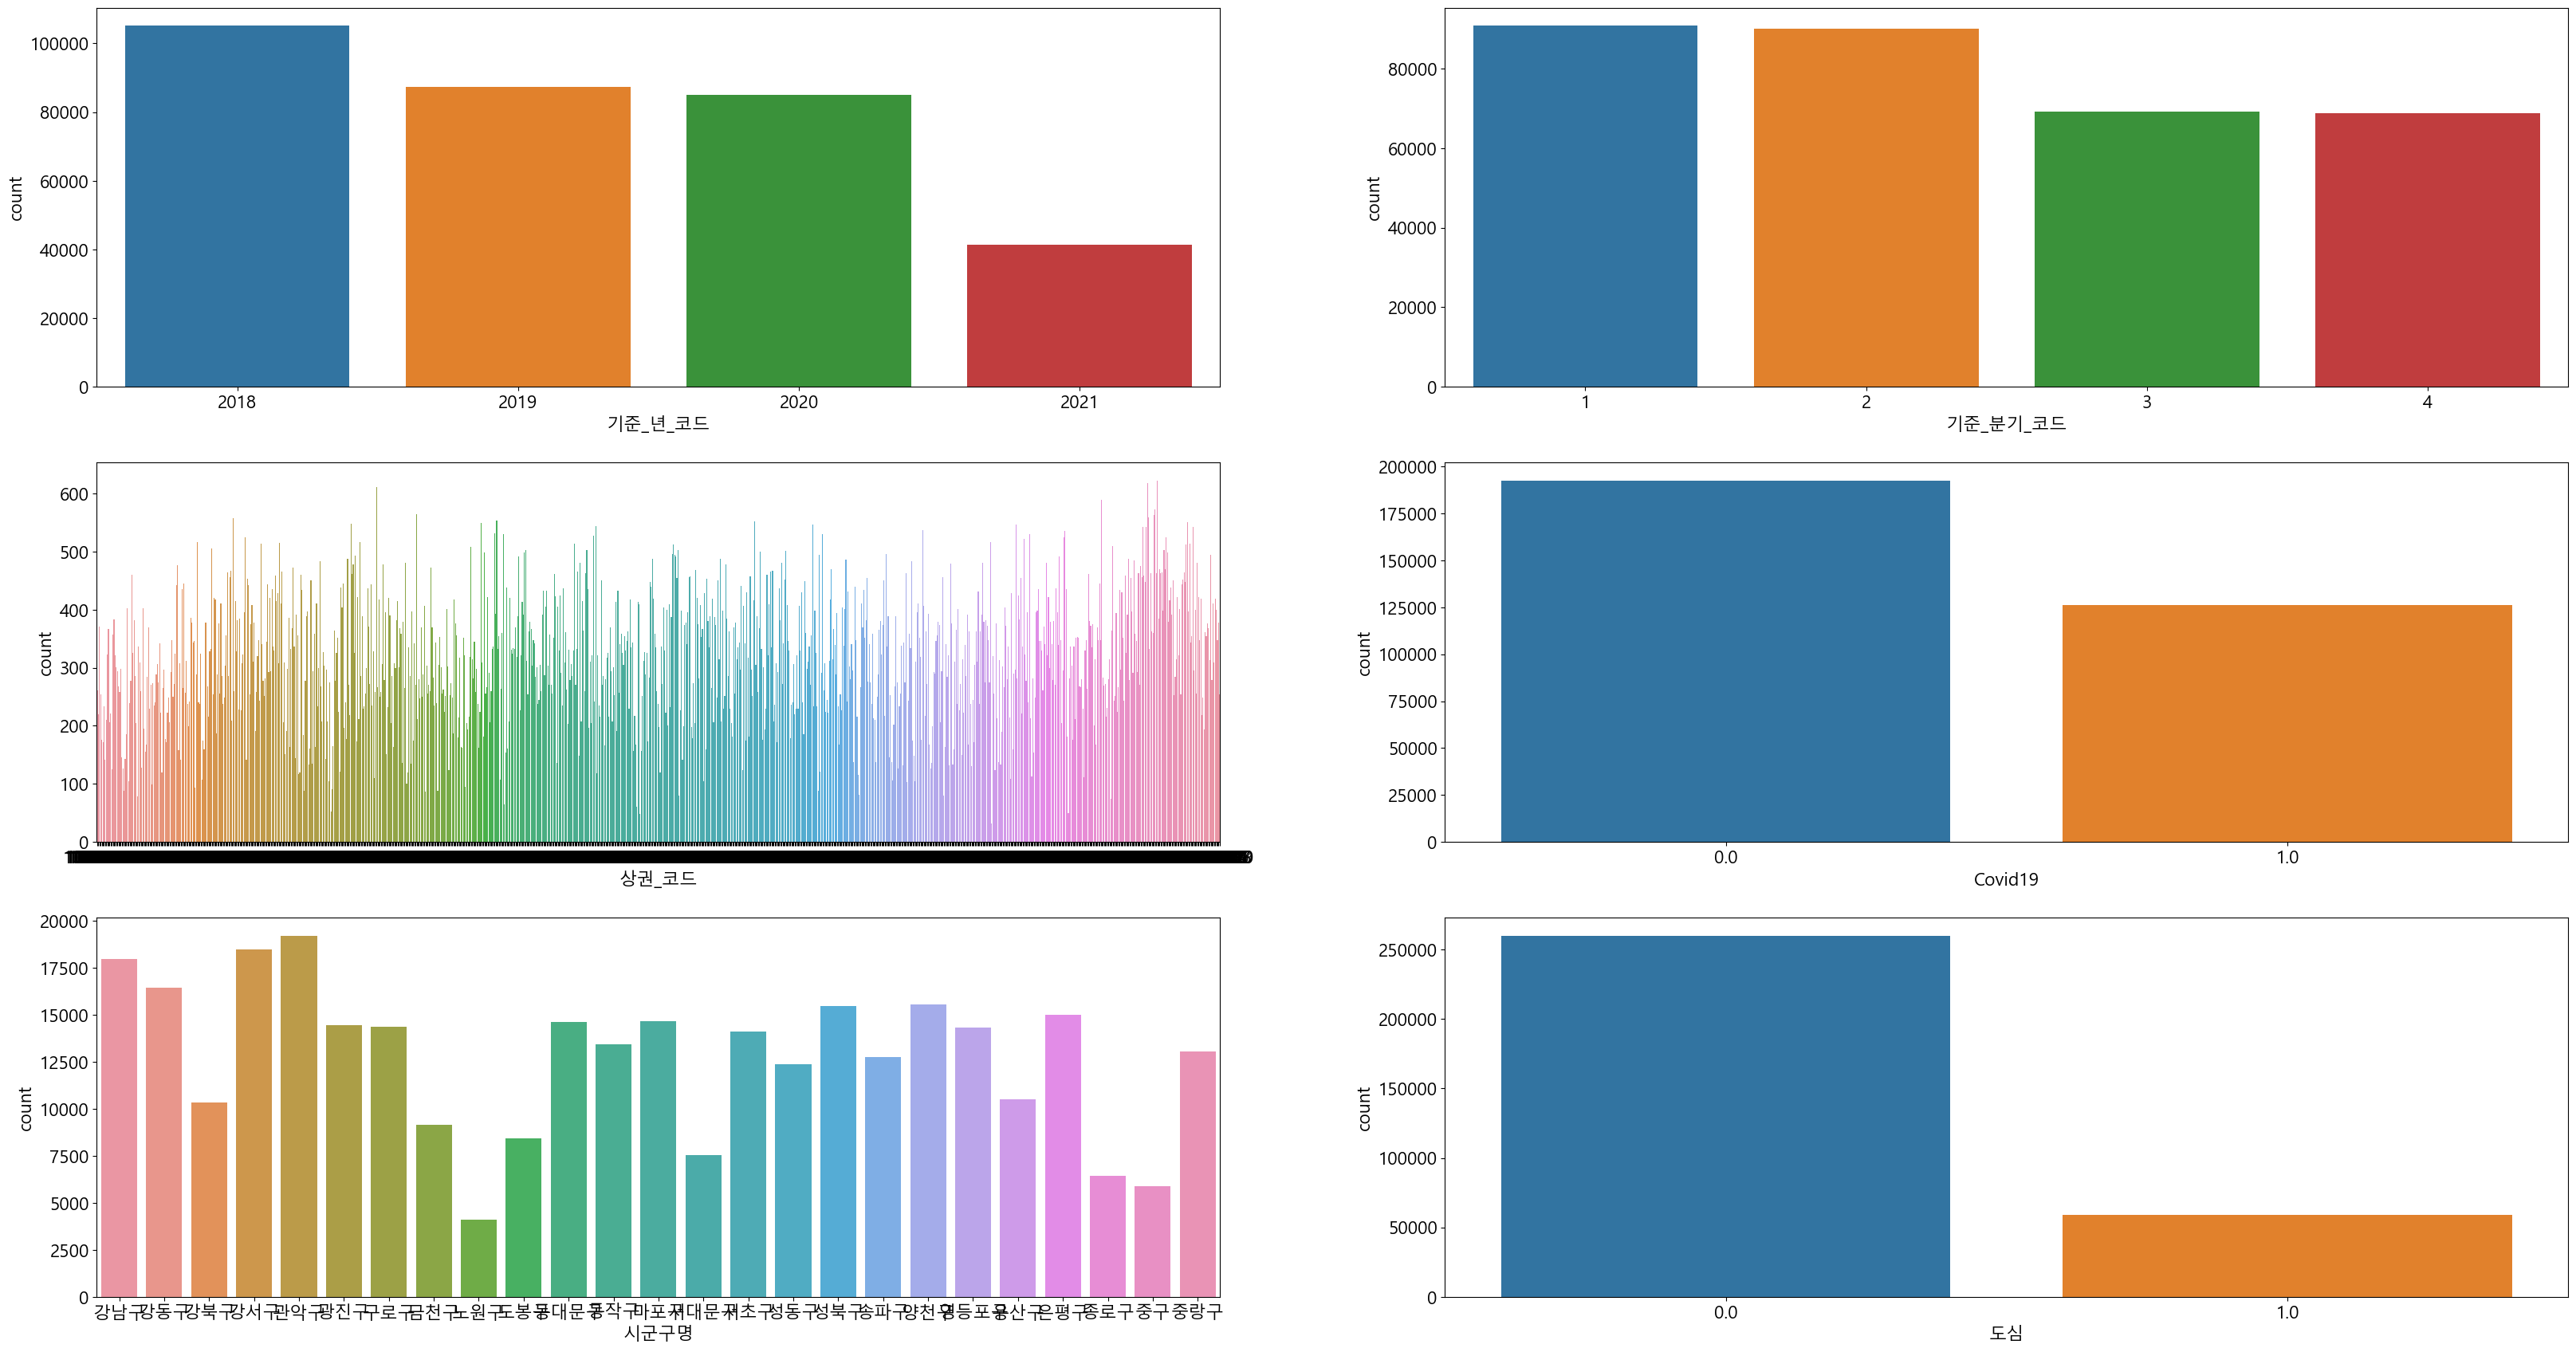

In [13]:
target = ['기준_년_코드','기준_분기_코드','상권_코드','Covid19','시군구명','도심']

rows = round(len(target)/2)

fig, ax = plt.subplots(rows, 2, figsize=(40, 7*rows))

for i,v in enumerate(target):
    r = int(i / 2)
    c = i % 2
    sb.countplot(x=v, data=cdf, ax=ax[r][c])

plt.show()
plt.close()

## #03. 연속형 변수에 대한 기초 통계량 확인

### 결측치 확인

In [4]:
df.isna().sum()

기준_년_코드          0
기준_분기_코드         0
상권_코드            0
분기당_매출_금액        9
주중_매출_금액         9
주말_매출_금액         9
남성_매출_금액         9
여성_매출_금액         9
점포수              9
Covid19          9
일과시간_금액          9
일과이후_금액          9
청년금액             9
중년금액             9
장년금액             9
상권_코드_명          9
엑스좌표_값           9
와이좌표_값           9
시군구_코드           9
행정동_코드           9
시군구명             9
시군구코드            9
도심               9
총_직장_인구_수    52879
총_생활인구_수     96684
dtype: int64

### 결측치가 있는 데이터의 내용을 확인

In [5]:
null_df = df.query('(총_직장_인구_수.isnull()) or (총_생활인구_수.isnull())')

> 생활인구가 집계되지 않은 지역은 행정구에서 데이터 수집이 이루어지지 않은 것으로 보고 분석에서 제외하기로 함.

### 결측치 정제

In [6]:
df2 = df.dropna()
df2.isna().sum()

print(df2.shape)

(222124, 25)


### 기초통계량 확인

In [7]:
tmp = df2.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.550897e+08,7.510396e+08,53.0,19381384.25,68322769.0,2.236953e+08,9.334306e+10
주중_매출_금액,1.945460e+08,6.138572e+08,-70301897.0,14430924.50,51015538.5,1.693071e+08,9.060803e+10
주말_매출_금액,6.054370e+07,1.894200e+08,-60053636.0,2446229.25,13467007.0,5.076214e+07,1.187360e+10
남성_매출_금액,1.238206e+08,3.715709e+08,0.0,7664530.50,30326435.0,1.056897e+08,4.468054e+10
여성_매출_금액,1.057898e+08,3.354464e+08,-7499697.0,6592710.00,26861672.0,9.201153e+07,2.358525e+10
점포수,4.676654e+00,6.378883e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.419728e+08,5.305432e+08,-23926190.0,6694564.00,30981688.5,1.167935e+08,6.369344e+10
일과이후_금액,1.131169e+08,3.105393e+08,-86927726.0,6442846.25,26196999.0,9.320949e+07,2.964962e+10
청년금액,8.086605e+07,2.280624e+08,-3685222.0,3407537.00,16451777.5,6.565691e+07,1.568936e+10
중년금액,1.099931e+08,3.667343e+08,0.0,7627903.00,28740611.5,9.284734e+07,3.420627e+10


### 상자그림 확인

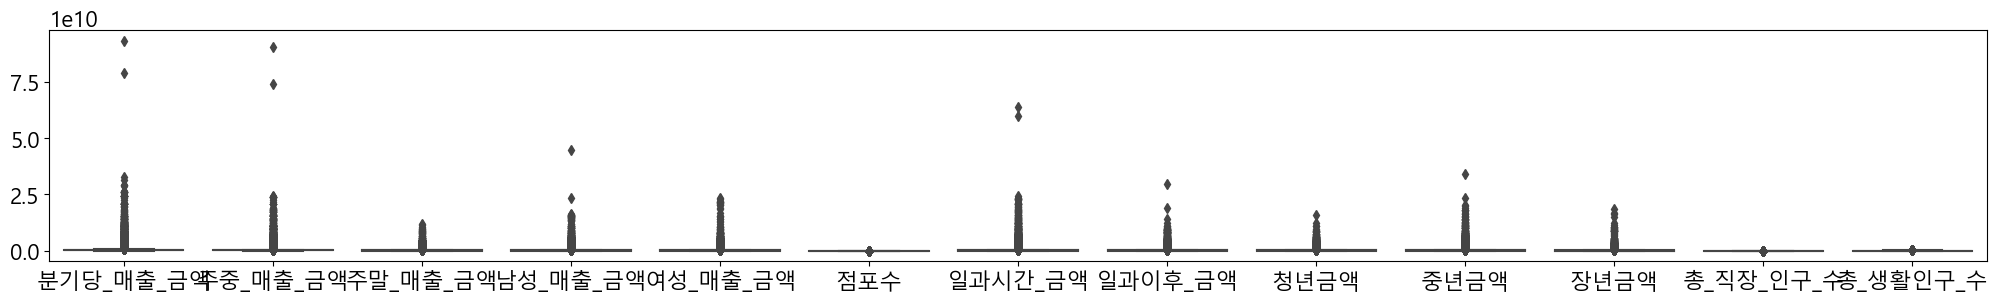

In [8]:
plt.figure(figsize=(25,3))
sb.boxplot(tmp)
plt.show()
plt.close()

> 무조건 표준화


### 데이터 표준화

#### 명목형을 제외한 연속형 변수만 추출

In [14]:
ndf = df.drop(cnames, axis=1)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318816 entries, 0 to 318815
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   분기당_매출_금액  318807 non-null  float64
 1   주중_매출_금액   318807 non-null  float64
 2   주말_매출_금액   318807 non-null  float64
 3   남성_매출_금액   318807 non-null  float64
 4   여성_매출_금액   318807 non-null  float64
 5   점포수        318807 non-null  float64
 6   일과시간_금액    318807 non-null  float64
 7   일과이후_금액    318807 non-null  float64
 8   청년금액       318807 non-null  float64
 9   중년금액       318807 non-null  float64
 10  장년금액       318807 non-null  float64
 11  엑스좌표_값     318807 non-null  float64
 12  와이좌표_값     318807 non-null  float64
 13  총_직장_인구_수  265937 non-null  float64
 14  총_생활인구_수   222132 non-null  float64
dtypes: float64(15)
memory usage: 36.5 MB


#### 데이터 표준화

In [15]:
std_ndf = helper.scalling(ndf)
std_ndf.head()

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,장년금액,엑스좌표_값,와이좌표_값,총_직장_인구_수,총_생활인구_수
0,-0.342493,-0.316573,-0.333402,-0.330194,-0.332490,-0.094235,-0.274990,-0.353870,-0.360707,-0.310816,-0.199888,0.434153,0.892586,NaN,NaN
1,-0.044966,-0.075638,0.065461,-0.065299,0.021998,-0.250177,-0.085480,0.031755,-0.006917,-0.001573,-0.085368,0.434153,0.892586,NaN,NaN
2,-0.276016,-0.267861,-0.227870,-0.272576,-0.252009,-0.562061,-0.261032,-0.222747,-0.212764,-0.264542,-0.223468,0.434153,0.892586,NaN,NaN
3,-0.301770,-0.266567,-0.333402,-0.249004,-0.329539,-0.250177,-0.225590,-0.338253,-0.360707,-0.211283,-0.229055,0.434153,0.892586,NaN,NaN
4,-0.327141,-0.303538,-0.314756,-0.336911,-0.291437,0.841416,-0.250447,-0.357360,-0.348555,-0.281177,-0.214087,0.434153,0.892586,NaN,NaN


#### 표준화 결과에 대한 상자그림

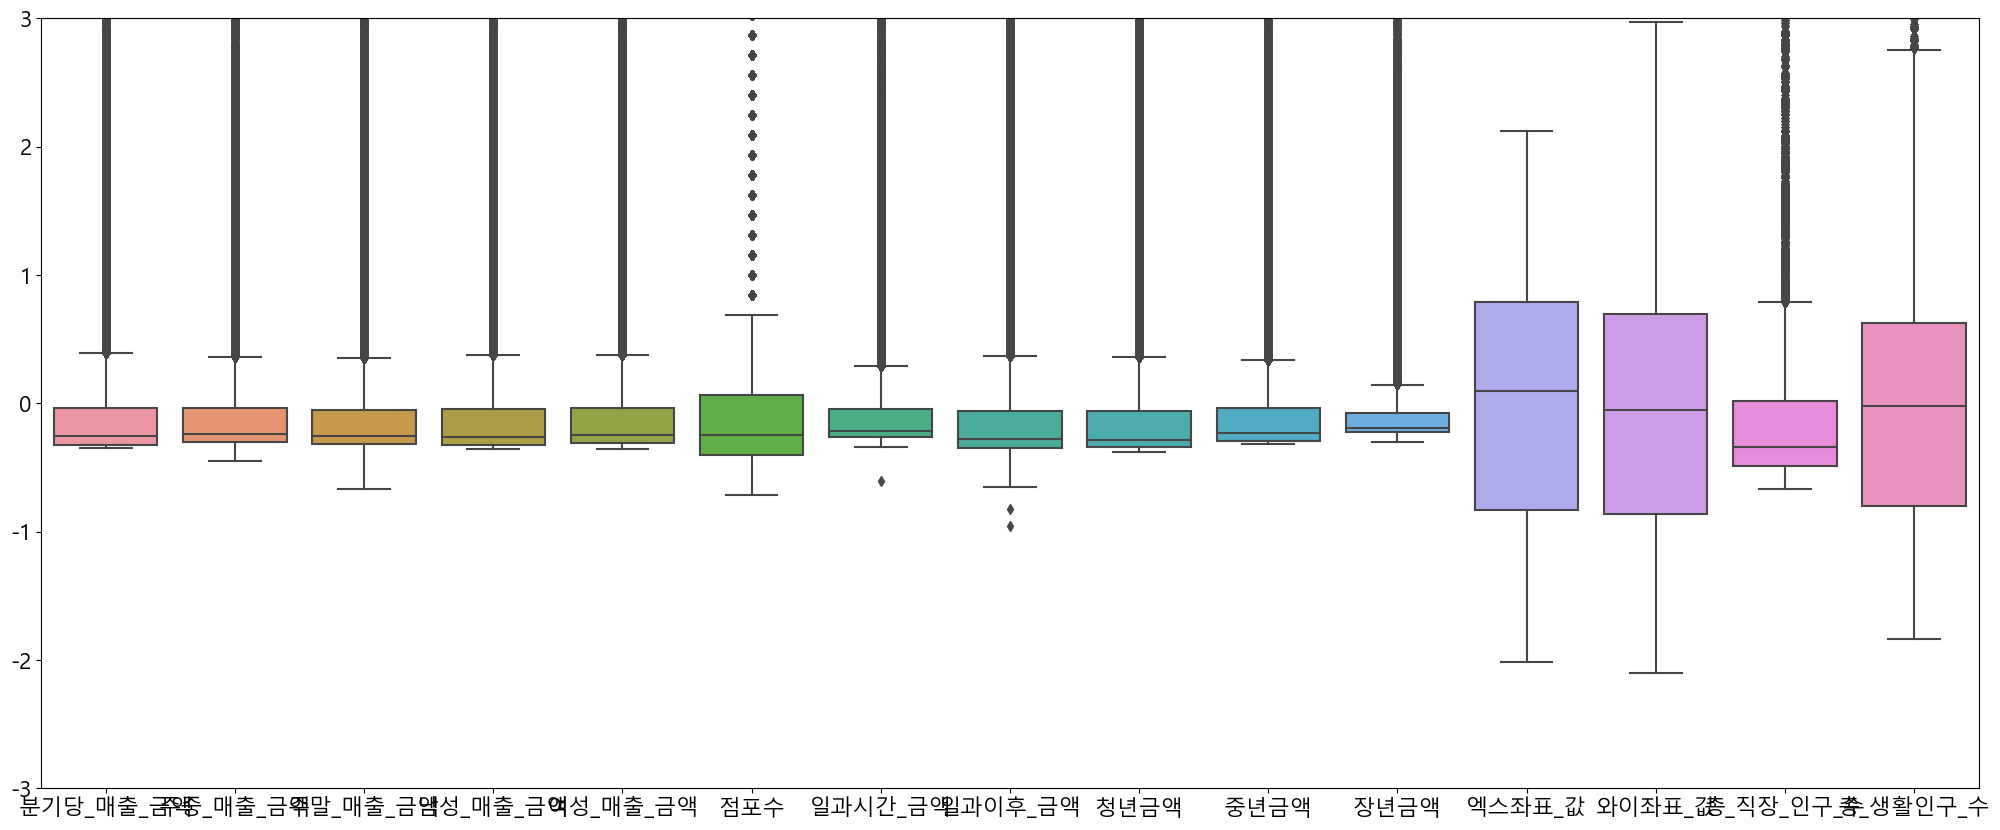

In [16]:
plt.figure(figsize=(25,10))
sb.boxplot(std_ndf)
plt.ylim(-3,3)
plt.show()
plt.close()

> 데이터 분포가 비슷해졌으므로 학습모델 구성에 활용해도 좋다고 판단

## #04. 최종 데이터프레임 구성

### 연속형과 명목형 데이터 결합

In [17]:
fdf = merge(std_ndf, cdf, left_index=True, right_index=True)
fdf.dropna(inplace=True)
fdf.to_excel("fdf.xlsx", index=False)
fdf

,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,일과시간_금액,일과이후_금액,청년금액,중년금액,...,기준_년_코드,기준_분기_코드,상권_코드,Covid19,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
37,-0.114833,-0.050072,-0.291529,-0.154725,-0.249656,-0.250177,0.029809,-0.311913,-0.220141,-0.198603,...,2018,3,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
38,-0.281704,-0.273598,-0.231870,-0.276926,-0.265851,-0.562061,-0.259899,-0.237653,-0.242405,-0.264206,...,2018,3,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
39,1.040827,0.892964,1.234693,1.567971,0.721551,-0.250177,0.489992,1.622993,2.745545,0.424623,...,2018,3,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
40,-0.297051,-0.266343,-0.315539,-0.289784,-0.308793,-0.406119,-0.220430,-0.335549,-0.281614,-0.293183,...,2018,3,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
41,-0.317187,-0.291230,-0.315029,-0.332930,-0.275396,0.841416,-0.245941,-0.341554,-0.314420,-0.290401,...,2018,3,1000289,0.0,인촌로17가길,11290.0,11290600.0,성북구,11290.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318802,0.988511,0.672305,1.736112,1.165582,1.048432,-0.406119,0.359191,1.709595,1.471155,1.119089,...,2021,1,1000307,1.0,한천로101가길,11290.0,11290760.0,성북구,11290.0,0.0
318803,0.019799,-0.017098,0.132751,0.060729,0.040513,-0.250177,-0.164819,0.306715,0.027493,0.034174,...,2021,1,1000307,1.0,한천로101가길,11290.0,11290760.0,성북구,11290.0,0.0
318804,-0.335156,-0.317093,-0.302858,-0.331235,-0.314578,0.061707,-0.263528,-0.355116,-0.354393,-0.287606,...,2021,1,1000307,1.0,한천로101가길,11290.0,11290760.0,성북구,11290.0,0.0
318805,-0.276939,-0.264691,-0.241664,-0.253522,-0.284231,-0.562061,-0.199596,-0.322192,-0.315337,-0.224258,...,2021,1,1000307,1.0,한천로101가길,11290.0,11290760.0,성북구,11290.0,0.0


## #05. 구 단위 코로나 전후 매출액 비교

In [18]:
tmp = df.filter(['시군구명', 'Covid19', '분기당_매출_금액']).groupby(['시군구명','Covid19'], as_index=False).mean()
tmp

,시군구명,Covid19,분기당_매출_금액
0,강남구,0.0,3.712935e+08
1,강남구,1.0,4.067136e+08
2,강동구,0.0,2.196592e+08
3,강동구,1.0,2.341338e+08
4,강북구,0.0,1.783274e+08
5,강북구,1.0,1.767230e+08
6,강서구,0.0,2.121816e+08
7,강서구,1.0,2.244594e+08
8,관악구,0.0,2.023904e+08
9,관악구,1.0,2.015775e+08


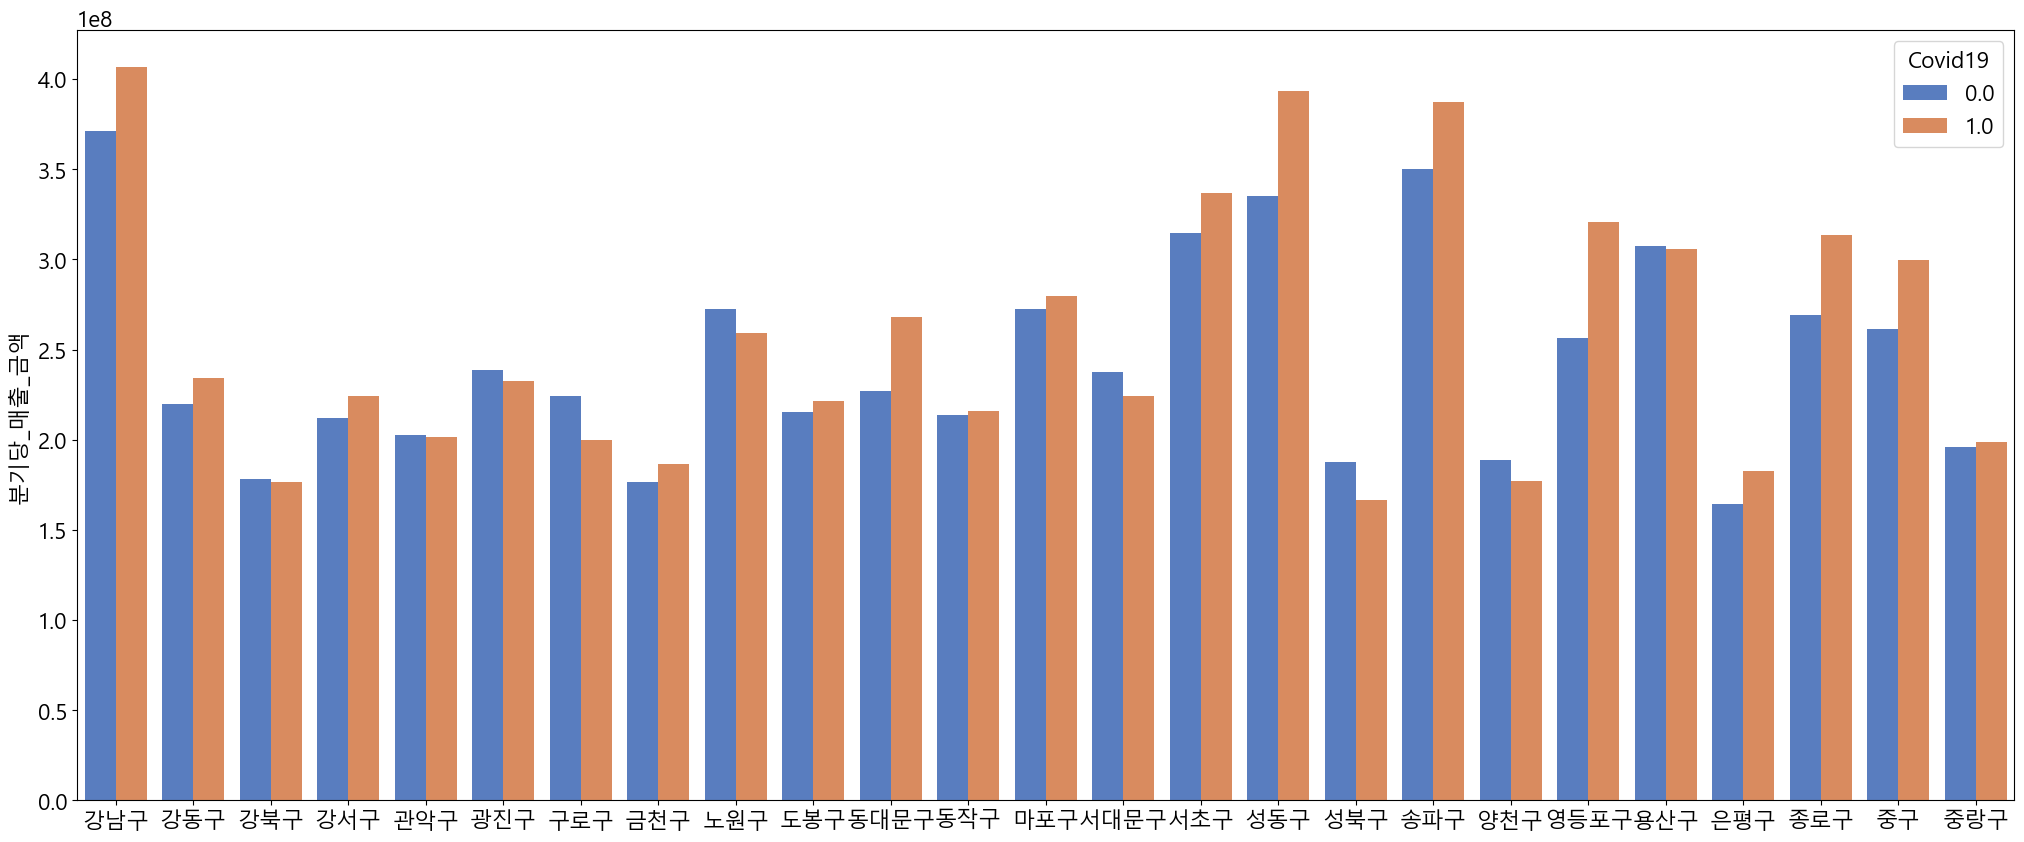

In [19]:
plt.figure(figsize=(25,10))
sb.barplot(data=tmp, x='시군구명', y='분기당_매출_금액', hue='Covid19', palette='muted')
plt.xlabel(None)
plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
plt.show()
plt.close()